In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
X_train=pd.read_csv('/content/drive/MyDrive/Kaggle/Used_Car_Price_Dataset/X_train.csv')
y_train=pd.read_csv('/content/drive/MyDrive/Kaggle/Used_Car_Price_Dataset/y_train.csv')

In [ ]:
df = pd.merge(X_train, y_train)


### Mileasge: Car mileage is the number of miles that the car has traveled since it was new. This number is determined by looking at the odometer that controls the distance
### mpg:  MPG stands for miles per gallon and is used to show how far your car can travel for every gallon (or 4.55 litres) of fuel it uses. 

In [ ]:
df

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
...,...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1,17999
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0,28900
4957,15453,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0,8998
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0,23198


In [ ]:
numerical_var=df.select_dtypes(include=np.number)

In [ ]:
numerical_var

,carID,year,mileage,tax,mpg,engineSize,price
0,13207,2019,4223,145.0,39.8,2.2,31995
1,17314,2015,47870,125.0,60.1,2.0,7700
2,12342,2019,5151,145.0,29.1,2.9,58990
3,13426,2016,20423,30.0,57.6,2.0,12999
4,16004,2020,3569,145.0,47.1,1.0,16990
...,...,...,...,...,...,...,...
4955,16898,2015,24314,125.0,56.6,2.1,17999
4956,14416,2017,18000,145.0,51.4,3.0,28900
4957,15453,2015,84932,30.0,60.1,2.0,8998
4958,14666,2017,30150,145.0,62.8,3.0,23198


In [ ]:
categorical_var=df.select_dtypes(include='object')
categorical_var

,brand,model,transmission,fuelType
0,hyundi,Santa Fe,Semi-Auto,Diesel
1,vauxhall,GTC,Manual,Diesel
2,audi,RS4,Automatic,Petrol
3,vw,Scirocco,Automatic,Diesel
4,skoda,Scala,Semi-Auto,Petrol
...,...,...,...,...
4955,merc,GL Class,Automatic,Diesel
4956,bmw,6 Series,Automatic,Diesel
4957,vw,CC,Manual,Diesel
4958,audi,A7,Semi-Auto,Diesel


In [ ]:
df.shape

(4960, 11)

In [ ]:
df.isna().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4960 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4960 non-null   int64  
 6   fuelType      4960 non-null   object 
 7   tax           4960 non-null   float64
 8   mpg           4960 non-null   float64
 9   engineSize    4960 non-null   float64
 10  price         4960 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 465.0+ KB


In [ ]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('================')

carID
13207    1
16569    1
14012    1
15745    1
19172    1
        ..
15802    1
12281    1
12674    1
19140    1
15135    1
Name: carID, Length: 4960, dtype: int64
brand
merc        790
vw          768
ford        766
bmw         638
hyundi      511
toyota      446
skoda       425
audi        343
vauxhall    273
Name: brand, dtype: int64
model
 Arteon         167
 Grand C-MAX    164
 Scirocco       163
 Prius          154
 Santa Fe       150
               ... 
 Eos              5
 Z3               5
 Getz             4
 CLK              4
 IQ               2
Name: model, Length: 90, dtype: int64
year
2019    1359
2017     816
2016     743
2018     534
2015     461
2020     337
2014     254
2013     181
2012      56
2011      51
2009      26
2010      25
2008      20
2004      18
2007      18
2006      15
2005      12
2003      10
2001       9
2002       6
1999       3
1997       2
2000       2
1998       2
Name: year, dtype: int64
transmission
Manual       1948
Automatic    1660
Se

In [ ]:
pd.pivot_table(df,values=['mileage','mpg','engineSize','price'],index=['brand','transmission'],aggfunc='mean')

engineSize       mileage        mpg         price
brand    transmission                                                   
audi     Automatic       3.173196  24588.984536  37.770103  42088.969072
         Manual          3.200000  58579.250000  32.362500  20354.250000
         Semi-Auto       3.087943  18915.049645  39.446809  43910.836879
bmw      Automatic       2.586555  27285.487395  95.486134  33751.399160
         Manual          2.613793  52220.586207  34.624138  15829.068966
         Semi-Auto       2.891105  12114.118598  38.356873  41811.638814
ford     Automatic       2.125893  20551.508929  45.966071  20810.026786
         Manual          1.531059  28239.497307  53.673788  13715.807899
         Semi-Auto       2.340206  21112.773196  45.496907  22993.134021
hyundi   Automatic       2.030435  25312.452174  39.286957  15510.834783
         Manual          1.748220  33850.427184  50.894175  10906.708738
         Semi-Auto       2.164368  17826.379310  41.771264  26629.597701
merc     Automatic       2.541649  30630.547569  44.850106  28376.433404
         Manual          2.041892  29601.027027  51.052703  18523.540541
         Semi-Auto       2.745679  21722.670782  46.322222  37657.827160
skoda    Automatic       1.373913   7925.043478  48.202174  17018.021739
         Manual          1.255344  22105.034351  55.143893  12176.992366
         Other           1.000000   3500.000000  47.100000  15999.000000
         Semi-Auto       1.364655  12307.137931  48.064655  16386.000000
toyota   Automatic       1.975325  31489.303030  76.859307  20296.774892
         Manual          1.904706  33369.529412  47.481176  14492.164706
         Semi-Auto       2.280000  15948.066667  38.184444  27763.355556
vauxhall Automatic       1.423333  20358.066667  44.520000  11032.300000
         Manual          1.524583  23169.204167  49.155417  11999.770833
         Semi-Auto       1.866667  47554.666667  36.466667  11186.666667
vw       Automatic       2.249774  19373.045249  41.324887  27406.552036
         Manual          1.883612  36039.993311  52.551505  14067.953177
         Semi-Auto       1.964516  15295.987903  45.265726  26101.258065

In [ ]:
df.groupby('brand')['fuelType'].value_counts()

brand     fuelType
audi      Diesel      202
          Petrol      141
bmw       Diesel      305
          Petrol      292
          Hybrid       33
          Other         6
          Electric      2
ford      Diesel      470
          Petrol      295
          Hybrid        1
hyundi    Diesel      375
          Petrol      136
merc      Diesel      672
          Petrol      112
          Hybrid        6
skoda     Petrol      325
          Diesel       96
          Other         4
toyota    Hybrid      149
          Diesel      148
          Petrol      134
          Other        15
vauxhall  Diesel      142
          Petrol      131
vw        Diesel      579
          Petrol      188
          Other         1
Name: fuelType, dtype: int64

In [ ]:
df.groupby('brand')['mileage'].max()

brand
audi        122000
bmw         134000
ford        174000
hyundi      130000
merc        259000
skoda       102000
toyota      174419
vauxhall    121349
vw          212000
Name: mileage, dtype: int64

## MAX Price & MIlEAGE of brands

In [ ]:
a=pd.pivot_table(df,index=['brand'],values=['mileage','price'],aggfunc='max')
a

,mileage,price
brand,,
audi,122000,145000
bmw,134000,99950
ford,174000,49999
hyundi,130000,43995
merc,259000,139995
skoda,102000,24904
toyota,174419,54991
vauxhall,121349,21490
vw,212000,69994


## MIN Price & MIlEAGE of brands

In [ ]:
b=a=pd.pivot_table(df,index=['brand'],values=['mileage','price'],aggfunc='min')
b

,mileage,price
brand,,
audi,10,4650
bmw,3,3495
ford,1,850
hyundi,1,1200
merc,10,1490
skoda,5,4399
toyota,3,1200
vauxhall,1,450
vw,1,1300


In [ ]:
df[(df['brand']=='audi') & (df['price']==145000)]

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
3897,15698,audi,R8,2020,Semi-Auto,2000,Petrol,145.0,21.1,5.2,145000


## Average price of each brand

In [ ]:
df_brand=pd.pivot_table(df,values=['mileage','mpg','engineSize','price'],index=['brand'],aggfunc='mean')

In [ ]:
df_brand

,engineSize,mileage,mpg,price
brand,,,,
audi,3.138776,23049.326531,38.333236,42330.967930
bmw,2.764890,19596.678683,59.498746,37623.815047
ford,1.720496,26212.934726,51.511358,15927.887728
hyundi,1.882583,29200.800391,46.728767,14619.753425
merc,2.557595,27794.093671,45.883924,30308.413924
skoda,1.297412,17852.232941,52.441412,13858.767059
toyota,1.979148,30637.919283,61.759193,18837.609865
vauxhall,1.517216,23128.260073,48.506593,11884.520147
vw,2.015104,24545.320312,46.968229,21792.028646


In [ ]:
df_brand.columns

Index(['engineSize', 'mileage', 'mpg', 'price'], dtype='object')

## Average price brand wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


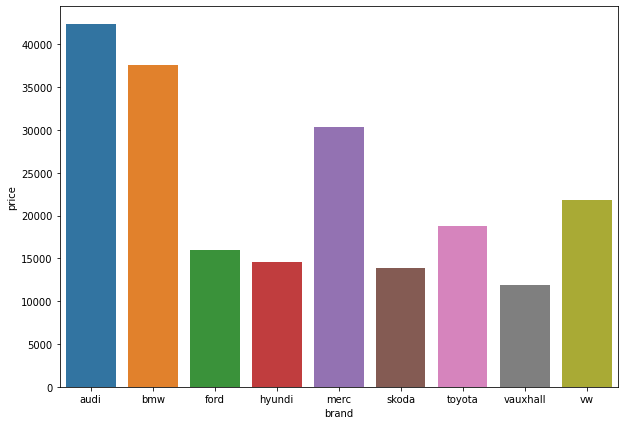

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(df_brand.index,df_brand['price'])
plt.show()

## Average mileage brand wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


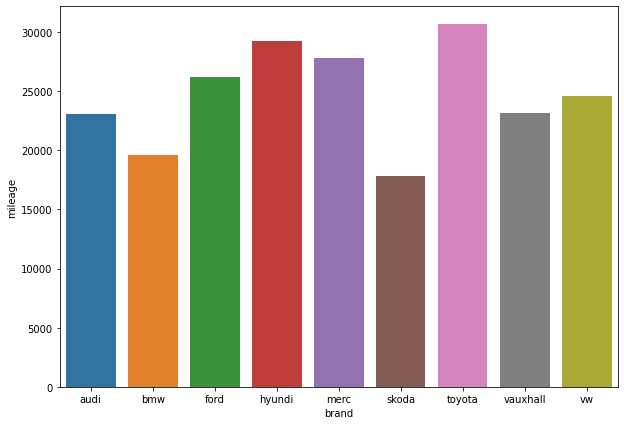

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(df_brand.index,df_brand['mileage'])
plt.show()

## Average mpg brand wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


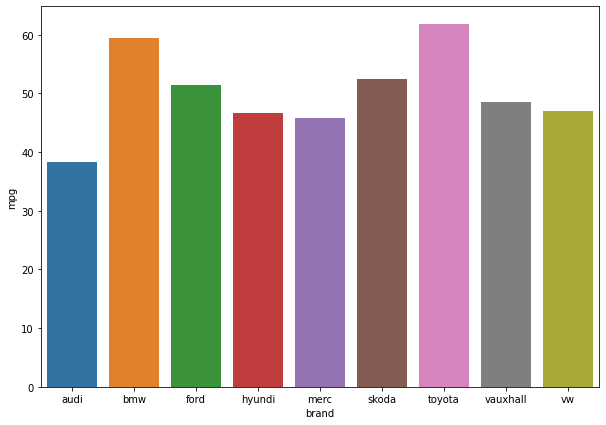

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(df_brand.index,df_brand['mpg'])
plt.show()

## Correlation

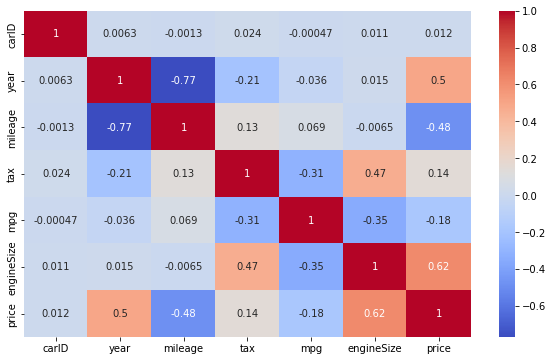

In [ ]:
plt.figure(figsize=(10,6))
cor=df.corr()
sns.heatmap(cor,cmap='coolwarm',annot=True)
plt.show()

In [ ]:
dfa=pd.pivot_table(df,index=['year','brand'],values=['mileage','mpg','price'],aggfunc='mean')

In [ ]:
dfa

mileage        mpg         price
year brand                                           
1997 audi      122000.000000  18.900000   4650.000000
     bmw        49000.000000  35.300000   3950.000000
1998 merc       78545.500000  27.700000  10990.000000
1999 bmw        66141.000000  35.300000   3972.500000
     merc       34000.000000  24.600000   5995.000000
...                      ...        ...           ...
2020 merc        1934.586207  40.337931  46679.862069
     skoda       1555.217391  48.615942  18923.550725
     toyota      1952.363636  41.300000  34120.590909
     vauxhall    1186.400000  45.120000  19452.600000
     vw          2680.928571  40.990476  33331.452381

[154 rows x 3 columns]

In [ ]:
dfa.columns

Index(['mileage', 'mpg', 'price'], dtype='object')

In [ ]:
dfb=df[['year','mileage']]

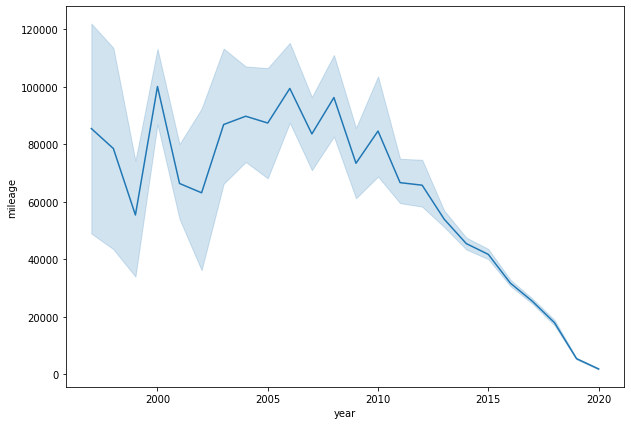

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['year'],y=df['mileage'])
plt.show()

## **Average Price over the year**

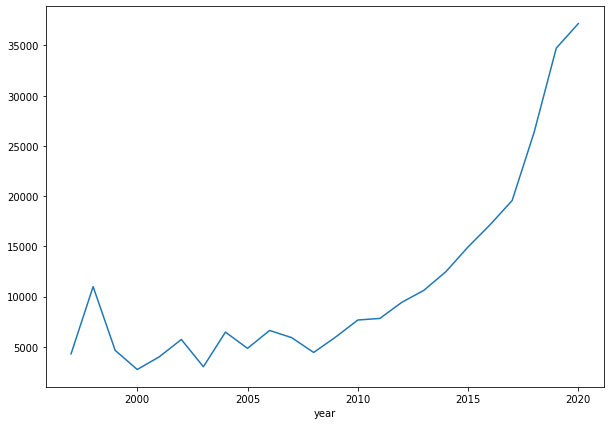

In [ ]:

dfb=df.groupby('year')['price'].mean()
plt.figure(figsize=(10,7))
sns.lineplot(x=dfb.index,y=dfb.values)
plt.show()

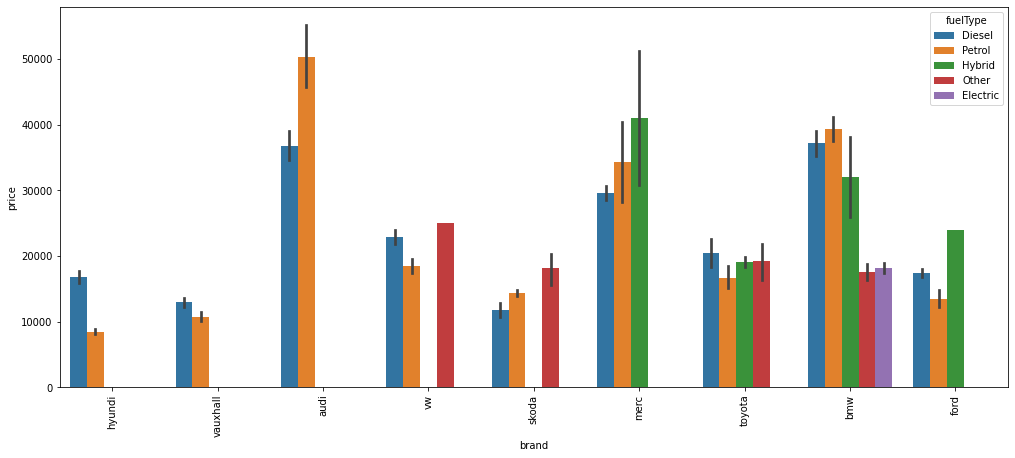

In [ ]:
plt.figure(figsize=(17,7))
sns.barplot(x=df['brand'],y=df['price'],hue=df['fuelType'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
pd.pivot_table(df,values=['price'],index=['brand','transmission','fuelType'],aggfunc='mean')

price
brand transmission fuelType              
audi  Automatic    Diesel    36273.194915
                   Petrol    51118.723684
      Manual       Diesel    21990.000000
                   Petrol    20120.571429
      Semi-Auto    Diesel    37748.698795
...                                   ...
vw    Automatic    Petrol    24033.756757
      Manual       Diesel    14881.611872
                   Petrol    11840.562500
      Semi-Auto    Diesel    27398.124294
                   Petrol    22868.225352

[66 rows x 1 columns]

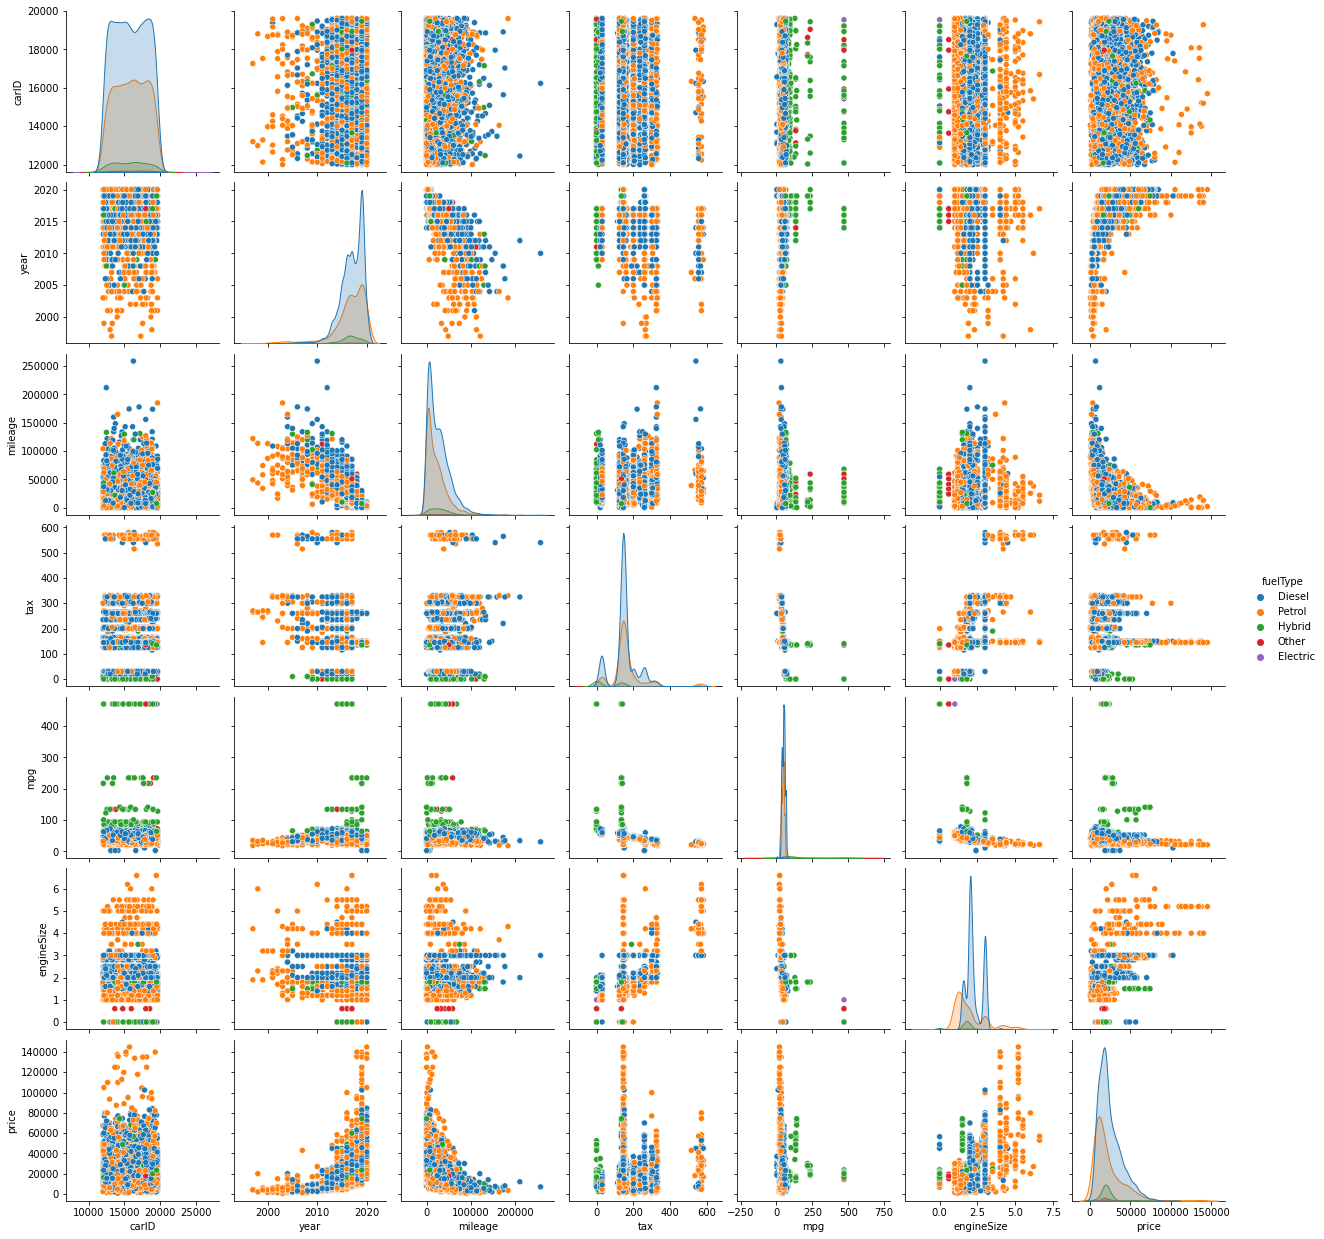

In [ ]:
sns.pairplot(df,hue='fuelType')

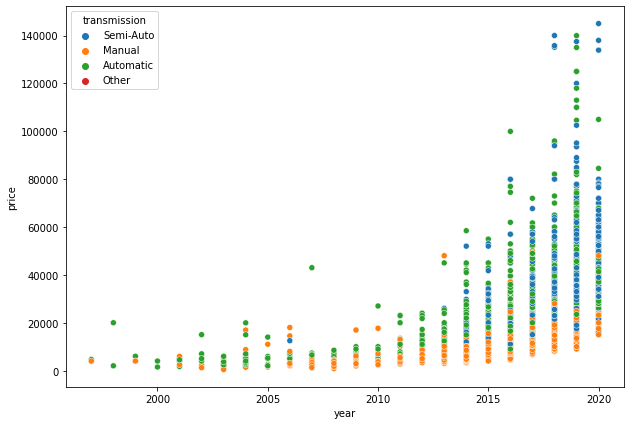

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['year'],y=df['price'],hue=df['transmission'])
plt.show()

In [ ]:
c=pd.pivot_table(df,index=['brand'],values=['engineSize','price'],aggfunc='mean')
c

,engineSize,price
brand,,
audi,3.138776,42330.967930
bmw,2.764890,37623.815047
ford,1.720496,15927.887728
hyundi,1.882583,14619.753425
merc,2.557595,30308.413924
skoda,1.297412,13858.767059
toyota,1.979148,18837.609865
vauxhall,1.517216,11884.520147
vw,2.015104,21792.028646


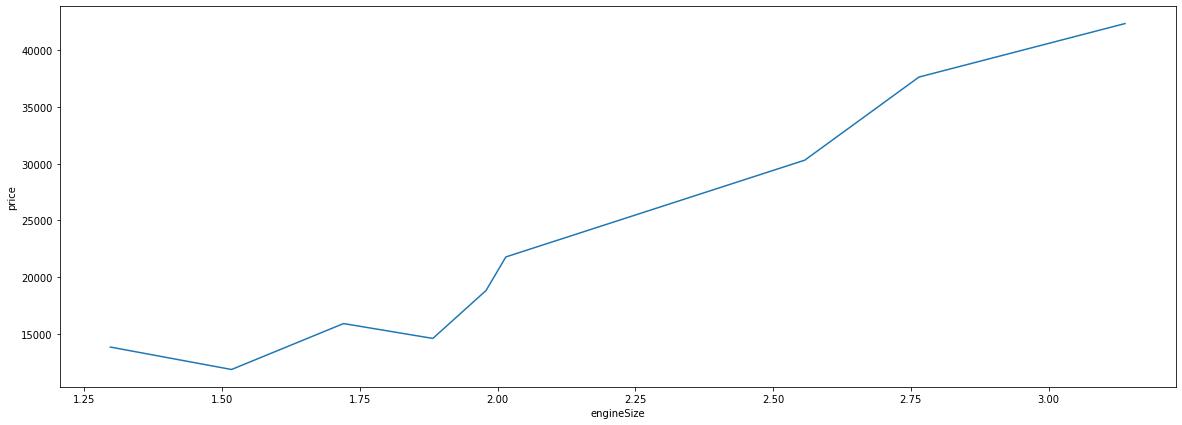

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(x=c['engineSize'],y=c['price'])
plt.show()

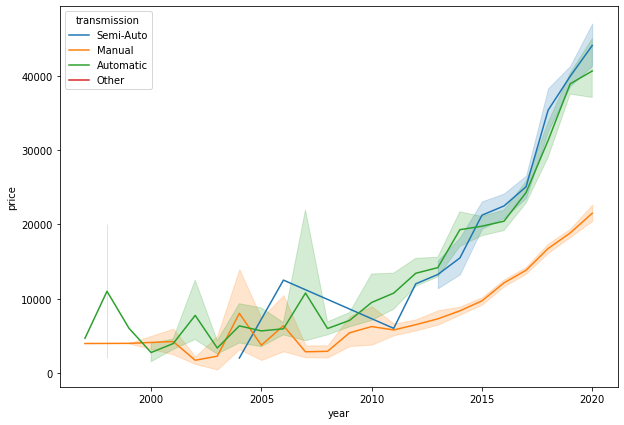

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['year'],y=df['price'],hue=df['transmission'])
plt.show()

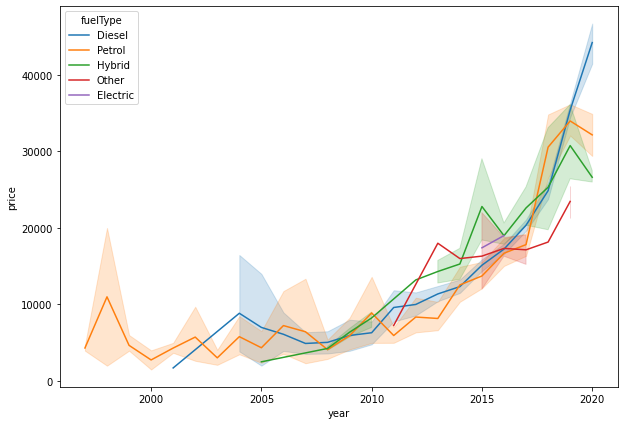

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['year'],y=df['price'],hue=df['fuelType'])
plt.show()

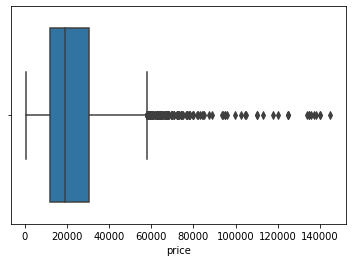

In [ ]:
sns.boxplot(x=df['price'])

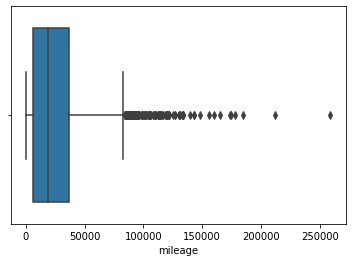

In [ ]:
sns.boxplot(x=df['mileage'])

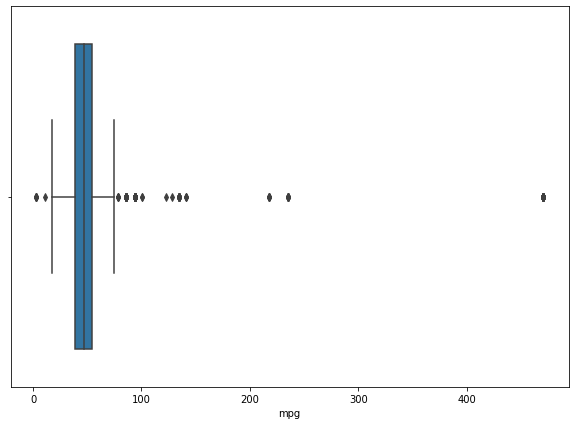

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['mpg'])
plt.show()

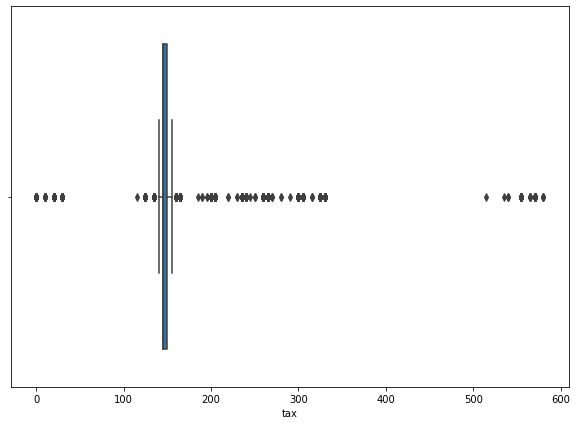

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['tax'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


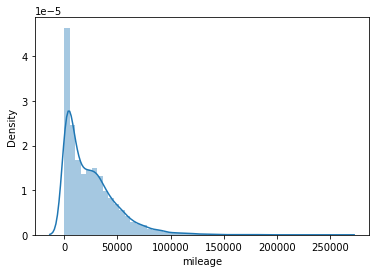

In [ ]:
sns.distplot(df['mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


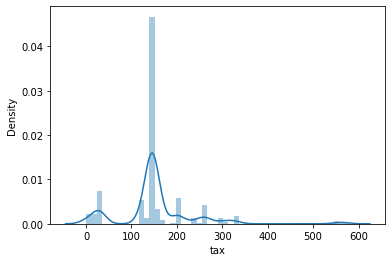

In [ ]:
sns.distplot(df.tax)


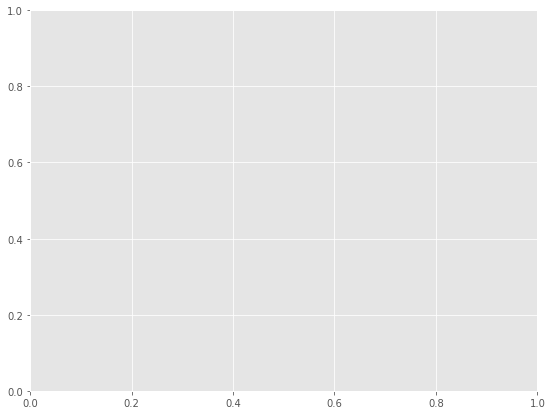

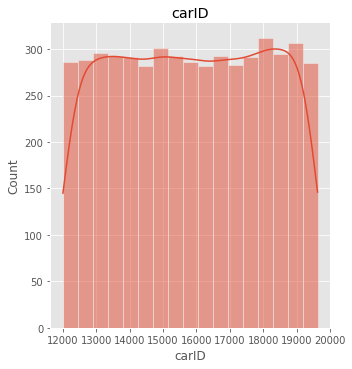

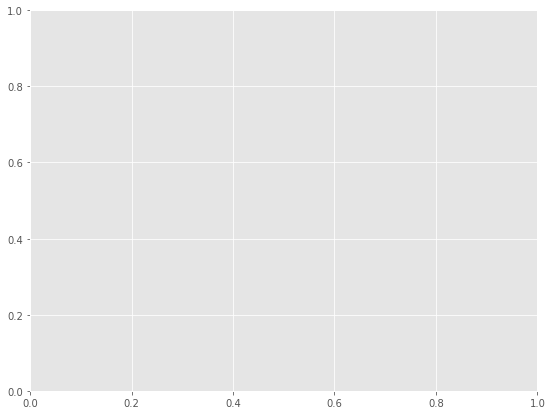

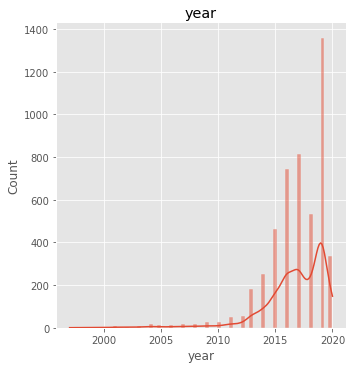

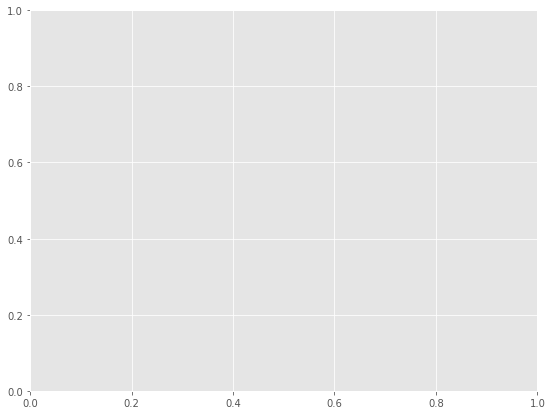

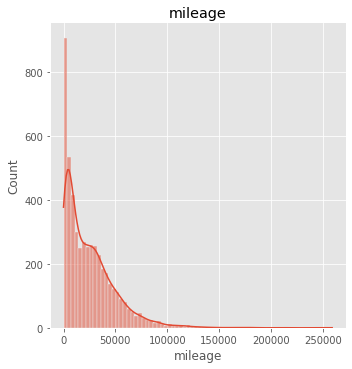

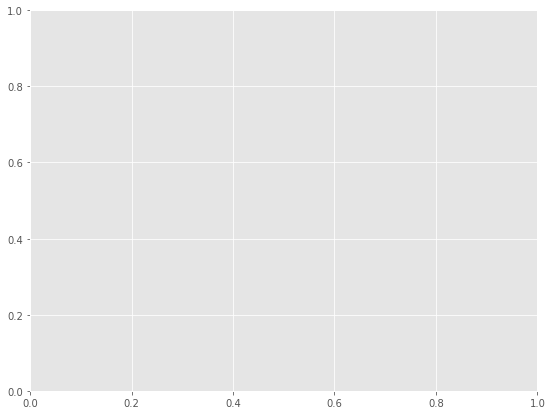

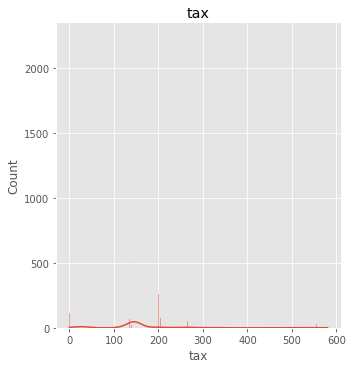

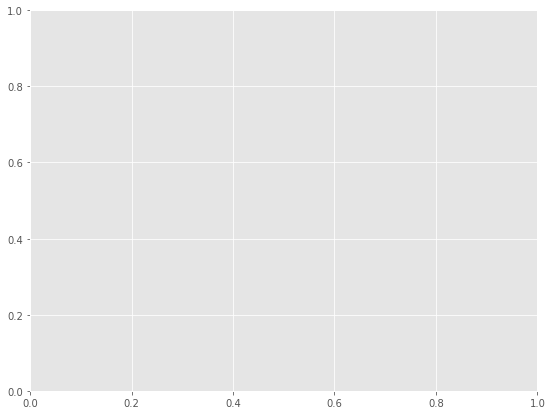

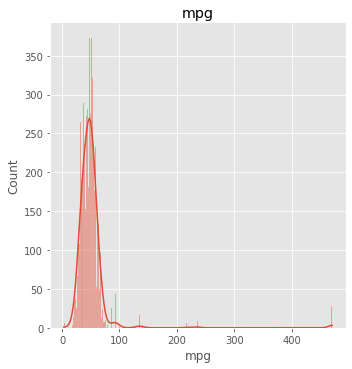

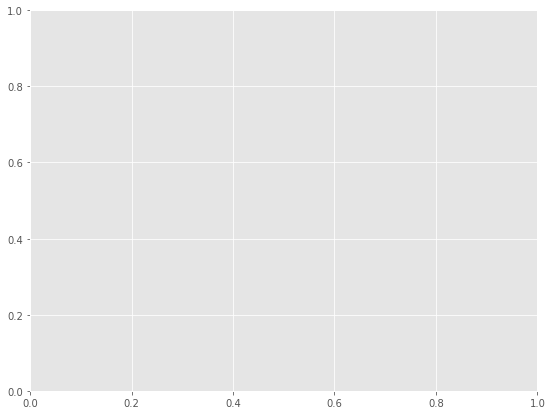

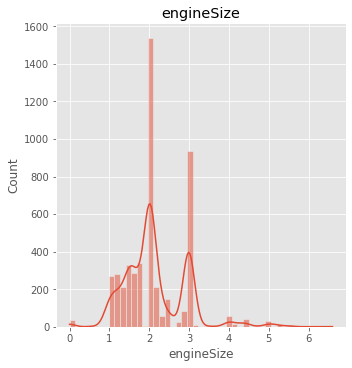

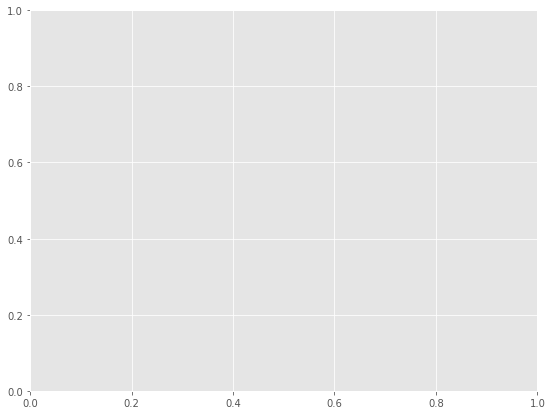

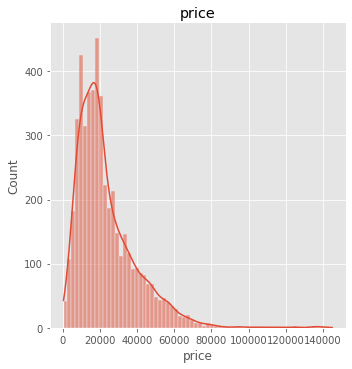

In [ ]:
f=df.select_dtypes(include=np.number)

plt.style.use('ggplot')
for i in f:
  plt.figure(figsize=(20,7))
  plt.subplot(121)
  sns.displot(df[i], kde=True)
  plt.title(i)

In [ ]:
numerical_var

,carID,year,mileage,tax,mpg,engineSize,price
0,13207,2019,4223,145.0,39.8,2.2,31995
1,17314,2015,47870,125.0,60.1,2.0,7700
2,12342,2019,5151,145.0,29.1,2.9,58990
3,13426,2016,20423,30.0,57.6,2.0,12999
4,16004,2020,3569,145.0,47.1,1.0,16990
...,...,...,...,...,...,...,...
4955,16898,2015,24314,125.0,56.6,2.1,17999
4956,14416,2017,18000,145.0,51.4,3.0,28900
4957,15453,2015,84932,30.0,60.1,2.0,8998
4958,14666,2017,30150,145.0,62.8,3.0,23198


## **Skewness**

In [ ]:
from scipy import stats


### MPG

In [ ]:
df['mpg'].skew()

9.608991840509233

In [ ]:
m1=np.log(df['mpg'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


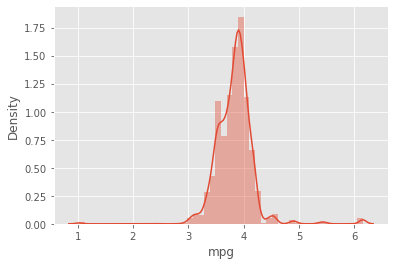

In [ ]:
sns.distplot(m1)

In [ ]:
m1.skew()

1.2589617296618227

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


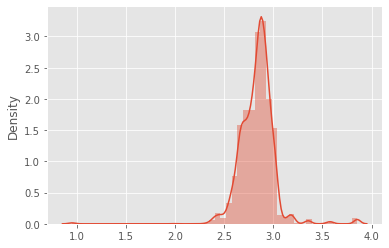

In [ ]:
m11=stats.boxcox(df['mpg'])[0]
m12=pd.Series(m11)
sns.distplot(m12)

In [ ]:
m12.skew()  #Box-Cox

-0.3484441630511622

In [ ]:
ms=np.sqrt(df['mpg'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


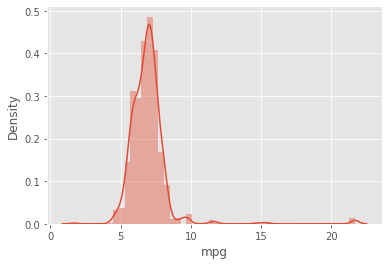

In [ ]:
sns.distplot(ms)

In [ ]:
ms.skew()

5.66028946648037

## Mileage

In [ ]:
mi_box_cox=stats.boxcox(df['mileage'])[0]

In [ ]:
df['mileage'].skew()

1.7677512955873775

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


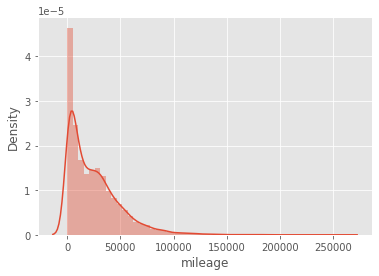

In [ ]:
sns.distplot(df['mileage'])

In [ ]:
m=np.log(df['mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


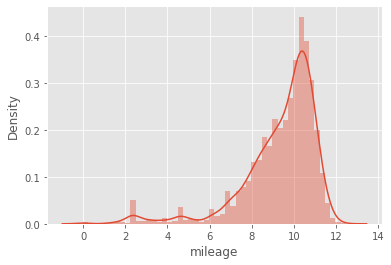

In [ ]:
sns.distplot(m)

In [ ]:
m.skew()

-1.9321577680284787

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


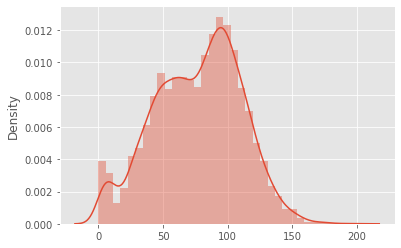

In [ ]:
m2=pd.Series(mi_box_cox)
sns.distplot(m2)

In [ ]:
m2.skew()

-0.15584519308605274

In [ ]:
m3=np.sqrt(df['mileage'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


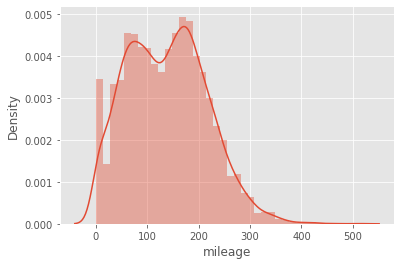

In [ ]:
sns.distplot(m3)

In [ ]:
m3.skew()

0.3277269362863288

## Tax

In [ ]:
df['tax'].skew()

1.670039657248337

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


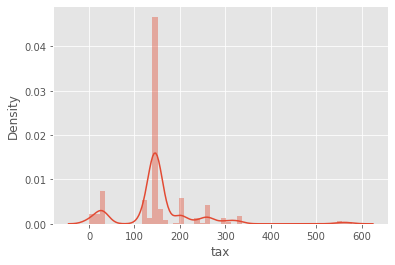

In [ ]:
sns.distplot(df['tax'])

In [ ]:
t=np.sqrt(df['tax'])

In [ ]:
t.skew()

-0.6676034502564671

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


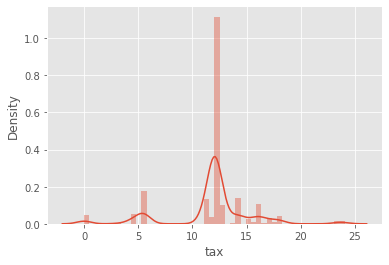

In [ ]:
sns.distplot(t)

##  making changes in columns

In [ ]:
df['mileage']=np.sqrt(df['mileage']) #Sqaure root tranformation for Mileage

In [ ]:
df.head(5)

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,64.984614,Diesel,145.0,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,218.792139,Diesel,125.0,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,71.770467,Petrol,145.0,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,142.909062,Diesel,30.0,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,59.741108,Petrol,145.0,47.1,1.0,16990


In [ ]:
df['mpg']=np.log(df['mpg'])

In [ ]:
print(m1)

0       3.683867
1       4.096010
2       3.370738
3       4.053523
4       3.852273
          ...   
4955    4.036009
4956    3.939638
4957    4.096010
4958    4.139955
4959    4.034241
Name: mpg, Length: 4960, dtype: float64


In [ ]:
df.head(5)

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,64.984614,Diesel,145.0,3.683867,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,218.792139,Diesel,125.0,4.096010,2.0,7700
2,12342,audi,RS4,2019,Automatic,71.770467,Petrol,145.0,3.370738,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,142.909062,Diesel,30.0,4.053523,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,59.741108,Petrol,145.0,3.852273,1.0,16990


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


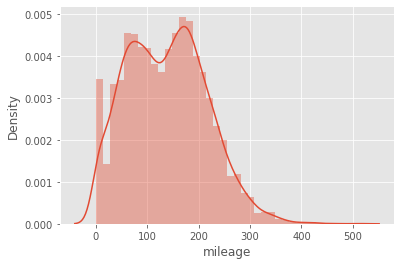

In [ ]:
sns.distplot(df['mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


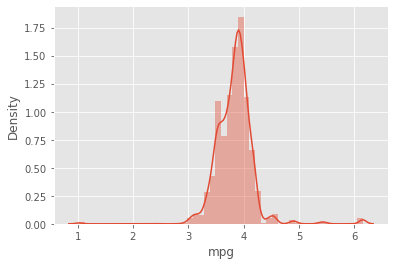

In [ ]:
sns.distplot(df['mpg'])

## Outliers after tranforming the data

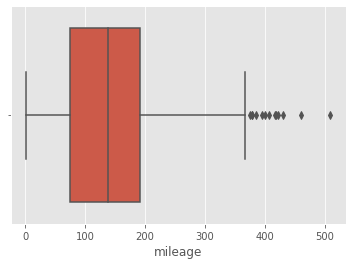

In [ ]:
sns.boxplot(x=df['mileage'])

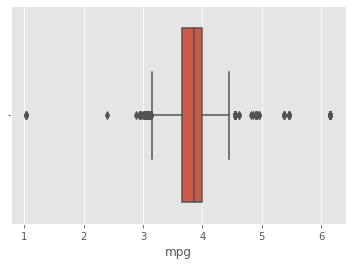

In [ ]:
sns.boxplot(x=df['mpg'])

In [ ]:
extreme_outliers_right_mil=df['mileage'].quantile(q=0.75) + 3 * ((df['mileage'].quantile(q=0.75))-(df['mileage'].quantile(q=0.25)))

In [ ]:
extreme_outliers_right_mil

540.9858955921992

In [ ]:
df[df['mileage']>=540]

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price


In [ ]:
extreme_outliers_right_mpg=df['mpg'].quantile(q=0.75) + 3 * ((df['mpg'].quantile(q=0.75))-(df['mpg'].quantile(q=0.25)))
extreme_outliers_left_mpg=df['mpg'].quantile(q=0.25) - 3 * ((df['mpg'].quantile(q=0.75))-(df['mpg'].quantile(q=0.25)))

In [ ]:
extreme_outliers_right_mpg

5.010578107652351

In [ ]:
extreme_outliers_left_mpg

2.639785719323275

In [ ]:
df[df['mpg']>=extreme_outliers_right_mpg].shape

(43, 11)

In [ ]:
df[df['mpg']<=extreme_outliers_left_mpg]

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
2405,17792,merc,G Class,2019,Semi-Auto,93.225533,Diesel,150.0,2.397895,3.0,102502
2513,14103,toyota,Hilux,2020,Automatic,70.710678,Diesel,260.0,1.029619,2.4,30500
2693,13164,toyota,Hilux,2019,Automatic,84.397867,Diesel,260.0,1.029619,2.4,26500
2748,13088,toyota,Hilux,2019,Manual,72.041655,Diesel,260.0,1.029619,2.4,20500
3860,19296,toyota,Hilux,2019,Automatic,57.879185,Diesel,260.0,1.029619,2.4,28495
4187,13693,toyota,Hilux,2020,Manual,7.071068,Diesel,260.0,1.029619,2.4,18495
4827,16571,toyota,Hilux,2020,Automatic,12.247449,Diesel,260.0,1.029619,2.4,36995


## tax

In [ ]:
otax_right=df['tax'].quantile(q=0.75) + 3 * ((df['tax'].quantile(q=0.75))-(df['tax'].quantile(q=0.25)))
otax_left=df['tax'].quantile(q=0.25) - 3 * ((df['tax'].quantile(q=0.75))-(df['tax'].quantile(q=0.25)))

In [ ]:
df[df['tax']>=otax_right]

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
16,17822,hyundi,IX20,2015,Automatic,186.756526,Petrol,200.0,3.775057,1.6,6890
22,12817,audi,S3,2015,Manual,220.907220,Petrol,205.0,3.683867,2.0,17950
24,13738,ford,Galaxy,2009,Manual,240.831892,Diesel,200.0,3.802208,1.8,5475
33,14648,audi,RS6,2016,Semi-Auto,150.000000,Petrol,325.0,3.380995,4.0,49950
41,17894,vw,Caravelle,2006,Manual,325.576412,Diesel,325.0,3.538057,2.5,14495
...,...,...,...,...,...,...,...,...,...,...,...
4933,17590,hyundi,Santa Fe,2013,Manual,236.638966,Diesel,200.0,3.835142,2.2,10149
4936,15376,vw,Caravelle,2013,Automatic,283.970069,Diesel,325.0,3.577948,2.0,15990
4937,13309,vw,Amarok,2015,Manual,212.896689,Diesel,260.0,3.563883,2.0,15490
4943,14815,ford,Mustang,2016,Manual,195.760057,Petrol,260.0,3.538057,2.3,24497


In [ ]:
df[df['tax']<=otax_left]

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
1,17314,vauxhall,GTC,2015,Manual,218.792139,Diesel,125.0,4.096010,2.0,7700
3,13426,vw,Scirocco,2016,Automatic,142.909062,Diesel,30.0,4.053523,2.0,12999
9,16726,ford,KA,2012,Manual,292.989761,Petrol,30.0,4.055257,1.2,3491
11,18995,merc,CLS Class,2016,Automatic,217.154323,Diesel,125.0,4.055257,2.1,17999
19,16270,merc,GL Class,2016,Automatic,107.949062,Diesel,20.0,4.209160,2.1,17999
...,...,...,...,...,...,...,...,...,...,...,...
4934,12087,bmw,i3,2016,Automatic,209.033490,Hybrid,0.0,6.154433,0.0,16482
4938,16303,ford,Galaxy,2017,Manual,168.255758,Diesel,125.0,4.034241,2.0,17990
4940,12932,hyundi,IX20,2014,Manual,204.841402,Petrol,125.0,3.919991,1.4,5999
4955,16898,merc,GL Class,2015,Automatic,155.929471,Diesel,125.0,4.036009,2.1,17999


## Dropping Extreme Outliers

In [ ]:
index_right=df[df['mpg']>=extreme_outliers_right_mpg].index
index_left=df[df['mpg']<=extreme_outliers_left_mpg].index

In [ ]:
index_right

Int64Index([  50,  110,  146,  161,  249,  256,  486,  700,  767,  969, 1005,
            1053, 1374, 1544, 1719, 1754, 1870, 2216, 2219, 2393, 2396, 2481,
            2580, 2690, 2811, 2844, 3115, 3180, 3401, 3452, 3531, 3541, 3806,
            3967, 4075, 4143, 4492, 4600, 4847, 4887, 4923, 4934, 4946],
           dtype='int64')

In [ ]:
df.drop(index_right,axis=0,inplace=True)

In [ ]:
index_left

Int64Index([2405, 2513, 2693, 2748, 3860, 4187, 4827], dtype='int64')

In [ ]:
df.drop(index_left,axis=0,inplace=True)

In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
df.shape

(4910, 11)

In [ ]:
df[df['mpg']>=extreme_outliers_right_mpg]

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price


In [ ]:
df[df['mpg']<=extreme_outliers_left_mpg]

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price


# Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
categorical_var.columns

Index(['brand', 'model', 'transmission', 'fuelType'], dtype='object')

In [ ]:
df['brand']=le.fit_transform(df['brand'])
df['model']=le.fit_transform(df['model'])
df['transmission']=le.fit_transform(df['transmission'])
df['fuelType']=le.fit_transform(df['fuelType'])
df['year']=le.fit_transform(df['year'])

In [ ]:
df.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,3,69,22,3,64.984614,0,145.0,3.683867,2.2,31995
1,17314,7,30,18,1,218.792139,0,125.0,4.096010,2.0,7700
2,12342,0,58,22,0,71.770467,3,145.0,3.370738,2.9,58990
3,13426,8,71,19,0,142.909062,0,30.0,4.053523,2.0,12999
4,16004,5,70,23,3,59.741108,3,145.0,3.852273,1.0,16990


## Dropping CarID

In [ ]:
df.drop(columns=['carID'],inplace=True)

In [ ]:
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,3,69,22,3,64.984614,0,145.0,3.683867,2.2,31995
1,7,30,18,1,218.792139,0,125.0,4.096010,2.0,7700
2,0,58,22,0,71.770467,3,145.0,3.370738,2.9,58990
3,8,71,19,0,142.909062,0,30.0,4.053523,2.0,12999
4,5,70,23,3,59.741108,3,145.0,3.852273,1.0,16990


# Feature Scaling

### Standard Scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
df[['tax','mileage']]=ss.fit_transform(df[['tax','mileage']])

In [ ]:
df['mileage'].min()

-1.7699289447592947

## Train-Test

In [ ]:
X_train=df.iloc[:,:-1]
X_train

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,3,69,22,3,-0.942279,0,-0.096136,3.683867,2.2
1,7,30,18,1,1.047244,0,-0.339605,4.096010,2.0
2,0,58,22,0,-0.854503,3,-0.096136,3.370738,2.9
3,8,71,19,0,0.065686,0,-1.496086,4.053523,2.0
4,5,70,23,3,-1.010104,3,-0.096136,3.852273,1.0
...,...,...,...,...,...,...,...,...,...
4905,4,26,18,0,0.234106,0,-0.339605,4.036009,2.1
4906,1,0,20,0,-0.047432,0,-0.096136,3.939638,3.0
4907,8,11,18,1,1.986838,0,-1.496086,4.096010,2.0
4908,0,3,20,3,0.463163,0,-0.096136,4.139955,3.0


In [ ]:
y_train=df['price']
y_train

0       31995
1        7700
2       58990
3       12999
4       16990
        ...  
4905    17999
4906    28900
4907     8998
4908    23198
4909    14900
Name: price, Length: 4910, dtype: int64

In [ ]:
X_test=pd.read_csv('/content/drive/MyDrive/Kaggle/Used_Car_Price_Dataset/X_test.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Kaggle/Used_Car_Price_Dataset/y_test.csv')

## Modelling

## Splitting for checking training accuracy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_tr,X_test_tr,y_train_tr,y_test_tr=train_test_split(X_train,y_train,test_size=0.3,random_state=777)

## RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
rr.fit(X_train_tr, y_train_tr)

RandomForestRegressor()

In [ ]:
y_pred_tr=rr.predict(X_test_tr)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
print(r2_score(y_test_tr, y_pred_tr))

0.955623118639189


## X_test

In [ ]:
X_test

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0
...,...,...,...,...,...,...,...,...,...,...
2667,19618,audi,A7,2015,Semi-Auto,21100,Petrol,325.0,29.7,4.0
2668,19620,merc,CLS Class,2015,Automatic,60972,Diesel,160.0,52.3,3.0
2669,19626,ford,Puma,2020,Manual,4111,Petrol,145.0,50.4,1.0
2670,19630,merc,CLA Class,2016,Automatic,25726,Petrol,200.0,41.5,2.0


In [ ]:
X_test['mileage']=np.sqrt(X_test['mileage'])
X_test['mpg']=np.log(X_test['mpg'])

In [ ]:
X_test.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,109.754271,Diesel,150.0,3.616309,3.0
1,12001,vw,Amarok,2017,Automatic,194.121096,Diesel,260.0,3.589059,3.0
2,12004,merc,GLS Class,2019,Automatic,100.000000,Diesel,145.0,3.526361,3.0
3,12013,skoda,Scala,2019,Manual,57.070132,Petrol,145.0,3.903991,1.0
4,12017,audi,RS6,2015,Semi-Auto,144.851648,Petrol,325.0,3.380995,4.0


In [ ]:
X_test.drop(columns=['carID'],inplace=True)

In [ ]:
X_test.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,merc,GLS Class,2017,Automatic,109.754271,Diesel,150.0,3.616309,3.0
1,vw,Amarok,2017,Automatic,194.121096,Diesel,260.0,3.589059,3.0
2,merc,GLS Class,2019,Automatic,100.000000,Diesel,145.0,3.526361,3.0
3,skoda,Scala,2019,Manual,57.070132,Petrol,145.0,3.903991,1.0
4,audi,RS6,2015,Semi-Auto,144.851648,Petrol,325.0,3.380995,4.0


In [ ]:
X_test['brand']=le.fit_transform(X_test['brand'])
X_test['model']=le.fit_transform(X_test['model'])
X_test['transmission']=le.fit_transform(X_test['transmission'])
X_test['fuelType']=le.fit_transform(X_test['fuelType'])
X_test['year']=le.fit_transform(X_test['year'])

In [ ]:
X_test[['tax','mileage']]=ss.fit_transform(X_test[['tax','mileage']])

In [ ]:
X_test

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,28,19,0,-0.379792,0,-0.040403,3.616309,3.0
1,8,6,19,0,0.752061,0,1.322207,3.589059,3.0
2,4,28,21,0,-0.510654,0,-0.102339,3.526361,3.0
3,5,69,21,1,-1.086595,4,-0.102339,3.903991,1.0
4,0,59,17,3,0.091069,4,2.127386,3.380995,4.0
...,...,...,...,...,...,...,...,...,...
2667,0,3,17,3,0.096526,4,2.127386,3.391147,4.0
2668,4,14,17,0,1.460472,0,0.083471,3.956996,3.0
2669,2,53,22,1,-0.992054,4,-0.102339,3.919991,1.0
2670,4,12,18,0,0.299574,4,0.578966,3.725693,2.0


## Training on Entire Training data

## RandomRegressor

In [ ]:
RR=rr.fit(X_train, y_train)

In [ ]:
y_pred=RR.predict(X_test)

In [ ]:
y_pred

array([37052.67, 22625.87, 49479.36, ..., 21893.24, 21867.29,  2552.9 ])

In [ ]:
y_test

,carID,price
0,12000,38000
1,12001,23495
2,12004,59999
3,12013,16713
4,12017,46000
...,...,...
2667,19618,28990
2668,19620,17450
2669,19626,21995
2670,19630,18700


In [ ]:
y_test_final=y_test['price'].values

In [ ]:
y_test_final

array([38000, 23495, 59999, ..., 21995, 18700,  2999])

In [ ]:
print(r2_score(y_test_final, y_pred))

0.9053865255748552


In [ ]:
car_final=pd.DataFrame({'carID':y_test.carID.values,'Predicted Price':y_pred})

In [ ]:
car_final

,carID,Predicted Price
0,12000,37052.67
1,12001,22625.87
2,12004,49479.36
3,12013,13839.88
4,12017,43737.36
...,...,...
2667,19618,34713.29
2668,19620,15097.54
2669,19626,21893.24
2670,19630,21867.29


In [ ]:
y_test

,carID,price
0,12000,38000
1,12001,23495
2,12004,59999
3,12013,16713
4,12017,46000
...,...,...
2667,19618,28990
2668,19620,17450
2669,19626,21995
2670,19630,18700


In [ ]:
vp=y_test.merge(car_final)

In [ ]:
vp

,carID,price,Predicted Price
0,12000,38000,37052.67
1,12001,23495,22625.87
2,12004,59999,49479.36
3,12013,16713,13839.88
4,12017,46000,43737.36
...,...,...,...
2667,19618,28990,34713.29
2668,19620,17450,15097.54
2669,19626,21995,21893.24
2670,19630,18700,21867.29


<Figure size 1440x504 with 0 Axes>

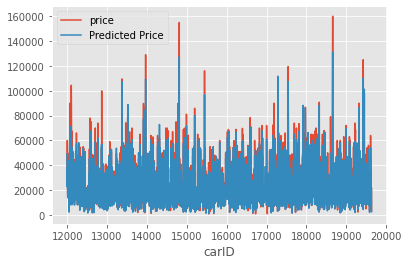

In [ ]:
plt.figure(figsize=(20,7))
vp.plot(x='carID', y=['price', 'Predicted Price'])
plt.show()

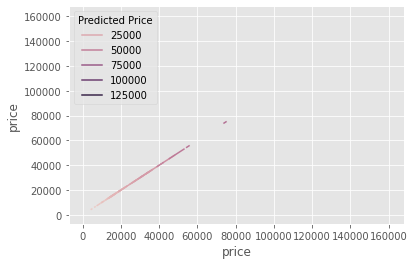

In [ ]:
sns.lineplot(x=vp['price'],y=vp['price'],hue=vp['Predicted Price'])

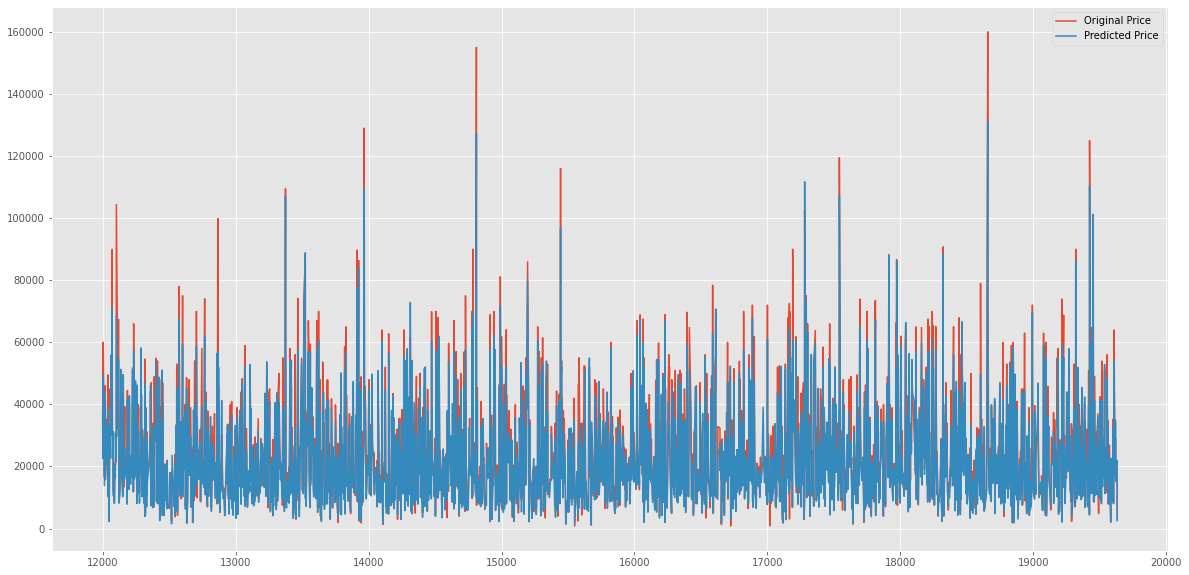

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(vp['carID'], vp['price'], label = "Original Price")
plt.plot(vp['carID'], vp['Predicted Price'], label = "Predicted Price")
plt.legend()
plt.show()

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_reg=reg.predict(X_test)

In [ ]:
print(r2_score(y_test_final, y_pred_reg))

0.6523509541315572


### Based on the accuracy score we will be selecting the Random Forest Regressor Model

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score= cross_val_score(RR, X_train, y_train, cv=5, scoring='r2')
print(np.mean(score))

0.9550301356264022


## Hyperparameter Tunning

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params= {"max_depth":[50,60,80,100], "min_samples_leaf": [4,8,50]}

In [ ]:
gsc = GridSearchCV(RR, cv=10, param_grid=params)

In [ ]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 60, 80, 100],
                         'min_samples_leaf': [4, 8, 50]})

In [ ]:
gsc.best_params_

{'max_depth': 100, 'min_samples_leaf': 4}

In [ ]:
gsc.best_score_

0.918137124097765

## Using the best parameters for training the model

In [ ]:
RR_best = RandomForestRegressor(max_depth=gsc.best_params_["max_depth"], min_samples_leaf = gsc.best_params_["min_samples_leaf"])


In [ ]:
score= cross_val_score(RR_best, X_train, y_train, cv=5, scoring='r2')
print(np.mean(score))

0.9099740769476539


## Train-test split for getting a better model

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True)

In [ ]:
RR_best.fit(X_train, y_train)


RandomForestRegressor(max_depth=100, min_samples_leaf=4)

In [ ]:
score=  RR_best.score(X_val, y_val) 
print(score)

0.9371657729237269


In [ ]:
score = r2_score(y_val, RR_best.predict(X_val))   # Predicting on training 
print(score)

0.9371657729237269


## Getting accuracy on our main Test data

In [ ]:
y_pred_RR_best=RR_best.predict(X_test)

In [ ]:
print(r2_score(y_test_final, y_pred_RR_best))

0.8526658891100058
